In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os 

WORK_AREA = '/Users/asaf/Workspace/biu/complex-utterance-to-code'
os.chdir(WORK_AREA)

paths = ['./src/', './src/api/v6', './notebooks/src']
for path in paths:
    path = os.path.normcase(path)
    if not any(os.path.normcase(sp) == path for sp in sys.path):
        sys.path.append(path)


In [3]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

from utils.eval_utils import *
from utils.eval_utils import model_eval

In [4]:
results_file_paths =[
    # './build/results/together_ai/test-152-together_ai-codellama_codellama_7b_instruct_hf-text2code-n100-apispec-ex11.csv.gz',
    # './build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2rep-n100-apispec-ex100.csv.gz',
    # './build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2code-n100-apispec-ex90.csv.gz',
    # './build/results/open_ai/test-152-openai_gpt_4_1106_preview-rep2rep-n100-apispec-ex100.csv.gz',
    # './build/results/open_ai/test-152-openai_gpt_4_1106_preview-rep2code-n100-apispec-ex100.csv.gz',
    # './build/results/open_ai/test-152-openai_gpt_3.5_turbo_1106-text2rep-n100-apispec-ex26.csv.gz',
    './build/results/open_ai/test-152-openai_gpt_3.5_turbo_1106-text2code-n100-examples.csv.gz',
    # './build/results/together_ai/test-152-together_ai-mistralai_mistral_7b_instruct_v0.2-text2code-n100-apispec-ex11.csv.gz',
    # './build/results/together_ai/test-152-together_ai-mistralai_mistral_7b_instruct_v0.2-text2rep-n100-apispec-ex11.csv.gz',
    # './build/results/together_ai/test-152-together_ai-deepseek_ai_deepseek_coder_33b_instruct-text2code-n100-apispec-ex11.csv.gz',
    # './build/results/together_ai/test-152-together_ai-deepseek_ai_deepseek_coder_33b_instruct-texp2rep-n100-apispec-ex11.csv.gz',
]

In [5]:
results = {}
for results_file_path in results_file_paths:
    print(f'Processing {results_file_path}')
    
    parse_to_code = results_file_path.find('2rep') > 0
    result, results_df = model_eval(
        results_file_path=results_file_path, 
        parse_to_code=parse_to_code,
        parse_rules_enabled=True,
    )
    
    for pass_k in result['humaneval']:
        print(f"{pass_k}.mean = {result['humaneval'][pass_k].mean()}")
        print(f"{pass_k}.std = {result['humaneval'][pass_k].std()}")
        print()
        failed_results_pct = (result['humaneval'][pass_k] == 0).sum()/len(result['humaneval'][pass_k])
        print(f"{pass_k}.failed_results_pct = {failed_results_pct}")
        success_results_pct = (result['humaneval'][pass_k] == 1).sum()/len(result['humaneval'][pass_k])
        print(f"{pass_k}.success_results_pct = {success_results_pct}")
        print()

    total_results = len(results_df)
    total_failed_results = (results_df['accuracy'] == 0).sum()
    total_success_results = (results_df['accuracy'] == 1).sum()
    print(f"failed_results_pct = {total_failed_results / total_results}")
    print(f"success_results_pct = {total_success_results / total_results}")
    print()
    
    results[results_file_path] = dict(result=result, results_df=results_df)

Processing ./build/results/open_ai/test-152-openai_gpt_3.5_turbo_1106-text2code-n100-examples.csv.gz
In humaneval_accuracy_score...
Evaluating test codes...


  0%|          | 0/15200 [00:00<?, ?it/s]

workout tunes: start: command not found
sh: start: command not found
at: cannot open lockfile /usr/lib/cron/jobs/.lockfile: Operation not permitted
music playlist titled workout tunes: start: command not found


pass@1.mean = 0.10344262295081964
pass@1.std = 0.19045300711812344

pass@1.failed_results_pct = 0.5409836065573771
pass@1.success_results_pct = 0.0

pass@10.mean = 0.3014321191324371
pass@10.std = 0.4096001550583356

pass@10.failed_results_pct = 0.5409836065573771
pass@10.success_results_pct = 0.0

failed_results_pct = 0.7507894736842106
success_results_pct = 0.12927631578947368



IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [6]:
file_path = './build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2rep-n100-apispec-ex100.csv.gz'
df = pd.read_csv(file_path)
df.head()

,sample_id,index,test_id,sample_minor_id,text,code,test,imports,lang_rep,lang_rep_raw,code_rep,code_rep_raw,output,n
0,0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,[ Module [ Assign [ Name [ product_name ] ] [ ...,Dense ast:\n\t[ Module\n\t\t[ product_name = P...,0
1,1,1,1_a,a,"If it's raining tomorrow morning, set my alarm...","date_time = DateTime.resolve_from_text(""tomorr...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Condition [ If [ Test [...,[ root [ advcl [ mark [ If ] ] [ nsubj [ it ] ...,[ Module [ date_time = DateTime.resolve_from_t...,[ Module [ Assign [ Name [ date_time ] ] [ Cal...,Dense ast:\n\t[ Module\n\t\t[ date_time = Date...,0
2,1,2,1_b,b,"If it's raining tomorrow morning, set my alarm...","date_time = DateTime.resolve_from_text(""tomorr...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Condition [ If [ Test [...,[ root [ advcl [ mark [ If ] ] [ nsubj [ it ] ...,[ Module [ date_time = DateTime.resolve_from_t...,[ Module [ Assign [ Name [ date_time ] ] [ Cal...,Dense ast:\n\t[ Module\n\t\t[ date_time = Date...,1
3,2,3,2,NaN,Play the new Taylor Swift album and pull up my...,"album = Album.resolve_from_text(""the new Taylo...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Play ] ] ...,[ root [ hd [ Play ] ] [ obj [ det [ the ] ] [...,[ Module [ album = Album.resolve_from_text('th...,[ Module [ Assign [ Name [ album ] ] [ Call [ ...,Dense ast:\n\t[ Module\n\t\t[ artist = Artist....,0
4,3,4,3_a,a,Send a message to dad if it rains tomorrow.,"date_time = DateTime.resolve_from_text(""tomorr...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Condition [ If [ Body [...,[ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...,[ Module [ date_time = DateTime.resolve_from_t...,[ Module [ Assign [ Name [ date_time ] ] [ Cal...,Dense ast:\n\t[ Module\n\t\t[ date_time = Date...,0


In [7]:
results_file_path = './build/results/together_ai/test-152-together_ai-codellama_codellama_7b_instruct_hf-text2code-n100-apispec-ex11.csv.gz'
result, results_df = model_eval(
    results_file_path=results_file_path, 
    parse_to_code=False,
    parse_rules_enabled=True,
)
for pass_k in result['humaneval']:
    print(f"{pass_k}.mean = {result['humaneval'][pass_k].mean()}")
    print(f"{pass_k}.std = {result['humaneval'][pass_k].std()}")
    failed_results_pct = (result['humaneval'][pass_k] == 0).sum()/len(result['humaneval'][pass_k])
    print(f"{pass_k}.failed_results_pct = {failed_results_pct}")
    success_results_pct = (result['humaneval'][pass_k] > 0).sum()/len(result['humaneval'][pass_k])
    print(f"{pass_k}.success_results_pct = {success_results_pct}")
    print()

In humaneval_accuracy_score...


  0%|          | 0/5660 [00:00<?, ?it/s]

sh: -c: line 0: syntax error near unexpected token `playlist='shower''
sh: -c: line 0: `play_music(playlist='shower')'
sh: -c: line 0: syntax error near unexpected token `recipient='Lucas','
sh: -c: line 0: `send_message(recipient='Lucas', content='I'm just now getting in the shower and it will be 15 or 20 minutes until I'm out.')'
sh: start_shower_playlist: command not found
sh: send_message_to_lucas: command not found
sh: set_thermostat: command not found
sh: play_music_playlist: command not found


pass@1.mean = 0.012807017543859647
pass@1.std = 0.03820781455058412
pass@1.failed_results_pct = 0.8421052631578947
pass@1.success_results_pct = 0.15789473684210525

pass@10.mean = 0.08032506214002448
pass@10.std = 0.21477723034027504
pass@10.failed_results_pct = 0.8421052631578947
pass@10.success_results_pct = 0.15789473684210525



In [52]:
results_df = pd.read_csv('./build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2rep-n100-apispec-ex100.csv.gz')
results_df.columns

Index(['sample_id', 'index', 'test_id', 'sample_minor_id', 'text', 'code',
       'test', 'imports', 'lang_rep', 'lang_rep_raw', 'code_rep',
       'code_rep_raw', 'output', 'n'],
      dtype='object')

In [6]:
results_file_path = './build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2code-n100-apispec-ex90.csv.gz'#'./build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2rep-n100-apispec-ex100.csv.gz'
result, results_df = model_eval(
    results_file_path=results_file_path, 
    parse_to_code=False,
    parse_rules_enabled=True,
)
x_df = results_df.groupby(['sample_id', 'n']).agg(
    accuracy_avg=('accuracy', 'mean')
).reset_index().set_index(['sample_id'])
x_df['accuracy_avg_projected'] = x_df['accuracy_avg'].apply(lambda x: x if (False or(x == 1.0)) else 0)
x_df

scores_df = pd.DataFrame()
keys = []
for k in [1, 10]:
    scores_at_k = (
        x_df
        .groupby(['sample_id'])
        .apply(lambda x: x['accuracy_avg_projected'].sum())
        .apply(lambda c: pass_at_k(n=100, c=c, k=k))
    )
    scores_df = pd.concat([scores_df, scores_at_k], axis=1)
    keys.append(f"pass@{k}")
scores_df.columns = keys
scores_df
scores_df['pass@1'].mean()

In humaneval_accuracy_score...


  0%|          | 0/15200 [00:00<?, ?it/s]

0.3418852459016392

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [ ]:
scores_df['pass@1'].mean()

In [8]:
result['humaneval']

pass@1   pass@10
0   a    0.17  0.859486
1   a    0.40  0.995645
    b    0.10  0.669524
2   a    0.78  1.000000
3   a    0.16  0.840498
...       ...       ...
214 a    0.65  0.999989
216 a    0.34  0.987812
    b    0.86  1.000000
218 a    0.99  1.000000
238 a    0.00  0.000000

[152 rows x 2 columns]

In [60]:
result['humaneval']

pass@1  pass@10
0   a     0.0      0.0
1   a     0.0      0.0
    b     0.0      0.0
2   a     0.0      0.0
3   a     0.0      0.0
...       ...      ...
214 a     0.0      0.0
216 a     0.0      0.0
    b     0.0      0.0
218 a     0.0      0.0
238 a     0.0      0.0

[152 rows x 2 columns]

In [54]:
scores_df.sum()

pass@1     0.0
pass@10    0.0
dtype: float64

In [34]:
results_df.groupby(['sample_id']).size()#.apply(lambda x: x['accuracy_projected'].sum())

sample_id
0     100
1     200
2     100
3     200
4     100
5     100
6     100
7     100
8     100
9     100
10    100
13    200
14    100
15    200
16    100
17    100
18    100
19    200
20    100
21    100
22    100
25    200
27    100
30    100
31    100
32    100
33    100
35    200
36    100
38    100
39    200
40    200
41    100
44    100
45    100
46    100
47    100
48    100
52    100
54    100
55    100
58    200
59    100
60    200
63    160
dtype: int64

In [30]:
x = results_df[results_df['accuracy_projected'] == 1].loc[3]
x

index test_id   
sample_minor_id n                   
a               57      4     3_a  \
b               39      5     3_b   
                43      5     3_b   
                87      5     3_b   
                98      5     3_b   

                                                           text   
sample_minor_id n                                                 
a               57  Send a message to dad if it rains tomorrow.  \
b               39  Send a message to dad if it rains tomorrow.   
                43  Send a message to dad if it rains tomorrow.   
                87  Send a message to dad if it rains tomorrow.   
                98  Send a message to dad if it rains tomorrow.   

                                                                 code   
sample_minor_id n                                                       
a               57  date_time = DateTime.resolve_from_text("tomorr...  \
b               39  date_time = DateTime.resolve_from_text("tomorr...   
                43  date_time = DateTime.resolve_from_text("tomorr...   
                87  date_time = DateTime.resolve_from_text("tomorr...   
                98  date_time = DateTime.resolve_from_text("tomorr...   

                                                                 test   
sample_minor_id n                                                       
a               57  # test data\ndata_model = DataModel(reset=True...  \
b               39  # test data\ndata_model = DataModel(reset=True...   
                43  # test data\ndata_model = DataModel(reset=True...   
                87  # test data\ndata_model = DataModel(reset=True...   
                98  # test data\ndata_model = DataModel(reset=True...   

                                                              imports   
sample_minor_id n                                                       
a               57  from entities.generic import *\nfrom entities....  \
b               39  from entities.generic import *\nfrom entities....   
                43  from entities.generic import *\nfrom entities....   
                87  from entities.generic import *\nfrom entities....   
                98  from entities.generic import *\nfrom entities....   

                                                             lang_rep   
sample_minor_id n                                                       
a               57  [ root [ S [ Command [ Condition [ If [ Body [...  \
b               39  [ root [ S [ Command [ Condition [ If [ Body [...   
                43  [ root [ S [ Command [ Condition [ If [ Body [...   
                87  [ root [ S [ Command [ Condition [ If [ Body [...   
                98  [ root [ S [ Command [ Condition [ If [ Body [...   

                                                         lang_rep_raw   
sample_minor_id n                                                       
a               57  [ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...  \
b               39  [ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...   
                43  [ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...   
                87  [ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...   
                98  [ root [ hd [ Send ] ] [ obj [ det [ a ] ] [ h...   

                                                             code_rep   
sample_minor_id n                                                       
a               57  [ Module [ date_time = DateTime.resolve_from_t...  \
b               39  [ Module [ date_time = DateTime.resolve_from_t...   
                43  [ Module [ date_time = DateTime.resolve_from_t...   
                87  [ Module [ date_time = DateTime.resolve_from_t...   
                98  [ Module [ date_time = DateTime.resolve_from_t...   

                                                         code_rep_raw  ...   
sample_minor_id n                                                      ...   
a               57  [ Module [ Assign [ Name [ date_time ] ] [

In [15]:
generated_code = build_test_code(
    code=x['pred_code'], imports=x["imports"], test=x["test"]
)
results = eval_code(generated_code)
print(results)

{'code_failure': 0, 'execution_success': 1, 'execution_failure': 0, 'assertion_failure': 0, 'correct': 1, 'incorrect': 0, 'accuracy': 1.0}


In [4]:
results = {}
for results_file_path in results_file_paths:
    print(f'Processing {results_file_path}')
    
    parse_to_code = results_file_path.find('2rep') > 0
    result, results_df = model_eval(
        results_file_path=results_file_path, 
        parse_to_code=parse_to_code,
        parse_rules_enabled=True,
    )
    
    for pass_k in result['humaneval']:
        print(f"{pass_k}.mean = {result['humaneval'][pass_k].mean()}")
        print(f"{pass_k}.std = {result['humaneval'][pass_k].std()}")
        failed_results_pct = (results_df['humaneval'][pass_k] == 0).sum()/len(result['humaneval'][pass_k])
        print(f"{pass_k}.failed_results_pct = {failed_results_pct}")
        success_results_pct = (results_df['humaneval'][pass_k] == 1).sum()/len(result['humaneval'][pass_k])
        print(f"{pass_k}.success_results_pct = {success_results_pct}")
        print()
    
    results[results_file_path] = dict(result=result, results_df=results_df)

Processing ./build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2code-n100-apispec-ex18.csv.gz
In humaneval_accuracy_score...


  0%|          | 0/15200 [00:00<?, ?it/s]

pass@1.mean = 0.34309210526315786
pass@1.std = 0.3833785561142586
pass@1.failed_results_pct = 0.3223684210526316
pass@1.success_results_pct = 0.05263157894736842
pass@10.mean = 0.5598548767914064
pass@10.std = 0.4556166680443921
pass@10.failed_results_pct = 0.3223684210526316
pass@10.success_results_pct = 0.14473684210526316
Processing ./build/results/open_ai/test-152-openai_gpt_4_1106_preview-text2rep-n100-apispec-ex100.csv.gz
Parsing rep code to code (15200)


  0%|          | 0/15200 [00:00<?, ?it/s]

In humaneval_accuracy_score...


  0%|          | 0/15200 [00:00<?, ?it/s]

pass@1.mean = 0.44335526315789464
pass@1.std = 0.3927487511902739
pass@1.failed_results_pct = 0.19736842105263158
pass@1.success_results_pct = 0.03289473684210526
pass@10.mean = 0.6783082170548237
pass@10.std = 0.4210229914179232
pass@10.failed_results_pct = 0.19736842105263158
pass@10.success_results_pct = 0.17763157894736842
Processing ./build/results/together_ai/test-152-together_ai-mistralai_mistral_7b_instruct_v0.2-text2code-n100-apispec-ex11.csv.gz
In humaneval_accuracy_score...


  0%|          | 0/15200 [00:00<?, ?it/s]

pass@1.mean = 0.002631578947368421
pass@1.std = 0.014681467441374397
pass@1.failed_results_pct = 0.9539473684210527
pass@1.success_results_pct = 0.0
pass@10.mean = 0.019310164282509125
pass@10.std = 0.09833966040340834
pass@10.failed_results_pct = 0.9539473684210527
pass@10.success_results_pct = 0.0
Processing ./build/results/together_ai/test-152-together_ai-mistralai_mistral_7b_instruct_v0.2-text2rep-n100-apispec-ex11.csv.gz


TimeoutException: Timed out!

In [9]:
result['humaneval']['pass@1'].mean()

0.44335526315789464

In [16]:
(result['humaneval']['pass@1'] == 0).sum()/len(result['humaneval']['pass@1'])

0.19736842105263158

In [10]:
output_column = "output"
gold_column = "code"
code_column = "generated_code"
parse_to_code = "2rep" in results_file_path
force_parse_code_rep_to_code = True
parse_rules_enabled = True

results_df[output_column] = results_df[output_column].apply(clean_output)

if parse_to_code:
    print(f"Parsing rep code to code ({results_df[results_df[code_column].isna()].shape[0] if (code_column in results_df) else results_df.shape[0]})")
    results_df[code_column] = results_df.progress_apply(
        lambda x: x[code_column] if (not force_parse_code_rep_to_code and (code_column in x) and x[code_column]) else parse_code_rep_to_code(x[output_column], rules_enabled=parse_rules_enabled),
        axis=1
    )
else:
    results_df[code_column] = results_df[output_column]

Parsing rep code to code (15200)


  0%|          | 0/15200 [00:00<?, ?it/s]

In [11]:
code_column_name = "generated_code"
score_id_labels = ["sample_id", "sample_minor_id"]
soft = False

test_codes = results_df.apply(
    lambda x: build_test_code(
        code=x[code_column_name], imports=x["imports"], test=x["test"]
    ),
    axis=1,
)

results_df['eval_results'] = test_codes.progress_apply(eval_code1)

index_columns = results_df.index.names
results_df = results_df.reset_index().join(pd.json_normalize(results_df['eval_results'])).set_index(index_columns)

results_df.head()

  0%|          | 0/15200 [00:00<?, ?it/s]

,index,test_id,sample_minor_id,text,code,test,imports,lang_rep,lang_rep_raw,code_rep,...,input_seed,generated_code,eval_results,code_failure,execution_success,execution_failure,assertion_failure,correct,incorrect,accuracy
sample_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,42,,"{'code_failure': 1, 'execution_success': 0, 'e...",1,0,0,0,0,0,0.0
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,42,,"{'code_failure': 1, 'execution_success': 0, 'e...",1,0,0,0,0,0,0.0
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,42,,"{'code_failure': 1, 'execution_success': 0, 'e...",1,0,0,0,0,0,0.0
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,42,"FindProductEntity(product_name='Pepsi', domain...","{'code_failure': 0, 'execution_success': 0, 'e...",0,0,1,0,0,0,0.0
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,42,,"{'code_failure': 1, 'execution_success': 0, 'e...",1,0,0,0,0,0,0.0


In [12]:
score_column_name = "accuracy"
projected_score_column_name = score_column_name + "_projected"
score_id_labels = ["sample_id", "sample_minor_id"]
n = 100
ks = [1, 10]

results_df['sample_minor_id'] = results_df['sample_minor_id'].fillna('a')
results_df[projected_score_column_name] = results_df[score_column_name].apply(lambda x: x if (soft or(x == 1.0)) else 0)

scores_df = pd.DataFrame()
keys = []
for k in ks:
    scores_at_k = (
        results_df
        .groupby(score_id_labels)
        .apply(lambda x: x[projected_score_column_name].sum())
        .apply(lambda c: pass_at_k(n=n, c=c, k=k))
    )
    scores_df = pd.concat([scores_df, scores_at_k], axis=1)
    keys.append(f"pass@{k}")
scores_df.columns = keys
scores_df.head()

pass@1  pass@10
0 a     0.0      0.0
1 a     0.0      0.0
  b     0.0      0.0
2 a     0.0      0.0
3 a     0.0      0.0

In [30]:
scores_df[scores_df["pass@10"] > 0]

,,pass@1,pass@10
15,b,0.02,0.190909
140,b,0.06,0.477695


In [31]:
scores_df

pass@1  pass@10
0   a     0.0      0.0
1   a     0.0      0.0
    b     0.0      0.0
2   a     0.0      0.0
3   a     0.0      0.0
...       ...      ...
214 a     0.0      0.0
216 a     0.0      0.0
    b     0.0      0.0
218 a     0.0      0.0
238 a     0.0      0.0

[152 rows x 2 columns]

In [45]:
i = 4
print(results_df[results_df["accuracy"] == 1].iloc[i]["text"])
print(results_df[results_df["accuracy"] == 1].iloc[i]["generated_code"])

Is there a Laker game on Monday, Wednesday, and Thursday?
events = Calendar.find_events(date_time={'weekday': ['Monday', 'Wednesday', 'Thursday']})


In [36]:
df = results_df[results_df["accuracy"] > 0.0]
# print(df.iloc[0]["generated_code"])
results_df.groupby(score_id_labels).apply(lambda x: x[projected_score_column_name].sum())

sample_id  sample_minor_id
0          a                  0.0
1          a                  0.0
           b                  0.0
2          a                  0.0
3          a                  0.0
                             ... 
214        a                  0.0
216        a                  0.0
           b                  0.0
218        a                  0.0
238        a                  0.0
Length: 152, dtype: float64

In [13]:
print("pass@1", scores_df["pass@1"].mean())
print("pass@10", scores_df["pass@10"].mean())

pass@1 0.0005263157894736846
pass@10 0.004398712773382322


In [14]:
print("pass@1", scores_df["pass@1"].std())
print("pass@10", scores_df["pass@10"].std())

pass@1 0.005119689777984155
pass@10 0.04163051248410026


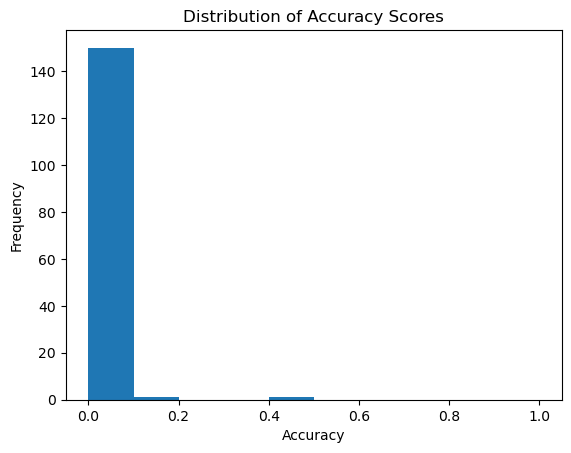

In [16]:
import matplotlib.pyplot as plt

plt.hist(scores_df["pass@10"].tolist(), bins=10, range=(0,1))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores')
plt.show()

In [48]:
print(results_df.iloc[1]["output"])


CheckAvailabilityAction(
    product="Pepsi",
    locations=[
        LocationEntity(name="Walmart"),
        LocationEntity(name="Walgreens")
    ]
)



In [54]:
# results_df1 = pd.concat([results_df.drop(['eval_results'], axis=1), pd.json_normalize(results_df['eval_results'])], axis=1)
index_columns = results_df.index.names
results_df1 = results_df.reset_index().join(pd.json_normalize(results_df['eval_results'])).set_index(index_columns)

,index,test_id,sample_minor_id,text,code,test,imports,lang_rep,lang_rep_raw,code_rep,...,n,test_code,eval_results,code_failure,execution_success,execution_failure,assertion_failure,correct,incorrect,accuracy
sample_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,0.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,28.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,29.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,30.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,31.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,pepsi_product_name = ProductName.resolve_from_...,# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,72.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....,[ root [ S [ Command [ Action [ hd [ Check ] ]...,[ root [ hd [ Check ] ] [ obj [ det [ the ] ] ...,[ Module [ product_name = ProductName.resolve_...,...,74.0,from entities.generic import *\nfrom entities....,"{'code_failure': 0, 'execution_success': 1, 'e...",0,1,0,0,1,2,0.333333
0,0,0,NaN,Check the availability of Pepsi at Walmart and...,"product_name = ProductName.resolve_from_text(""...",# test data\ndata_model = DataModel(reset=True...,from entities.generic import *\nfrom entities....

In [42]:
results_df['eval_results'] = results_df['test_code'].progress_apply(eval_code1)
results_df['eval_results']

  0%|          | 0/15200 [00:00<?, ?it/s]

sample_id
0      {'code_failure': 0, 'execution_success': 1, 'e...
0      {'code_failure': 0, 'execution_success': 1, 'e...
0      {'code_failure': 0, 'execution_success': 1, 'e...
0      {'code_failure': 0, 'execution_success': 1, 'e...
0      {'code_failure': 0, 'execution_success': 1, 'e...
                             ...                        
238    {'code_failure': 0, 'execution_success': 0, 'e...
238    {'code_failure': 0, 'execution_success': 0, 'e...
238    {'code_failure': 0, 'execution_success': 1, 'e...
238    {'code_failure': 0, 'execution_success': 0, 'e...
238    {'code_failure': 0, 'execution_success': 1, 'e...
Name: eval_results, Length: 15200, dtype: object

In [45]:
results_df.iloc[0]['eval_results']

{'code_failure': 0,
 'execution_success': 1,
 'execution_failure': 0,
 'assertion_failure': 0,
 'correct': 1,
 'incorrect': 2,
 'accuracy': 0.3333333333333333}

In [ ]:
projected_score_column_name = score_column_name + '_projected'
results_df[projected_score_column_name] = results_df[score_column_name].apply(lambda x: x if (soft or(x == 1.0)) else 0)
scores = (
    test_scores_df
    .groupby(score_id_labels)
    .apply(lambda x: x[projected_score_column_name].sum())
    .apply(lambda c: pass_at_k(n=n, c=c, k=k))
)

In [7]:
def humaneval_accuracy_score(
    n,
    data: pd.DataFrame,
    code_column_name: str = "pred_code",
    score_id_labels: Union[str, List[str]] = ["sample_id", "sample_minor_id"],
    score_column_name: str = "accuracy",
    soft=True
):
    test_codes = data.apply(
        lambda x: build_test_code(
            code=x[code_column_name], imports=x["imports"], test=x["test"]
        ),
        axis=1,
    )
    print("In humaneval_accuracy_score...")
    test_results = test_codes.progress_apply(lambda test_code: eval_code(test_code))
    test_results_df = pd.DataFrame.from_records(
        test_results.values, index=test_results.index
    )
    results = []
    for soft in [False, True]:
      for k in [1, 10]:
        test_scores_df = test_results_df.copy().reset_index()
        projected_score_column_name = score_column_name + '_projected'
        test_scores_df[projected_score_column_name] = test_scores_df[score_column_name].apply(lambda x: x if (soft or(x == 1.0)) else 0)
        scores = (
            test_scores_df
            .groupby(score_id_labels)
            .apply(lambda x: x[projected_score_column_name].sum())
            .apply(lambda c: pass_at_k(n=n, c=c, k=k))
        )
        score = scores.mean()
        std = scores.std()

        # print(f"len = {scores.shape[0]}, mean = {scores.sum() / scores.shape[0]}, score = {score}")
        print(f"Humaneval: n={n}\tk = {k}\tsoft = {soft}\tlen = {scores.shape[0]}\tscore = {score}")
        result = dict(score=score, n=n, k=k, soft=soft, scores=scores, results=test_results_df)
        results.append(result)
    return results

In [6]:
def eval_code1(code: str):
    test_results = {}

    if not code:
        test_results["code_failure"] = 1
    elif any([(illegal_str in code) for illegal_str in ["import time", "import sched", "import pygame", "from time import"]]):
        test_results["execution_failure"] = 1
    else:
        try:
            local_scope = {
                'print': suppressed_print,
                'input': suppressed_input,
                'time.sleep': suppressed_sleep,
                'scheduler.run': suppressed_scheduler_run
            }
            timed_code_execution_prefix = "import signal\n"
            timed_code_execution_prefix += "def signal_handler(signum, frame):\n"
            timed_code_execution_prefix += "    raise TimeoutException('Timed out!')\n"
            timed_code_execution_prefix += "signal.signal(signal.SIGALRM, signal_handler)\n"
            timed_code_execution_prefix += "time_limit = 1\n"
            timed_code_execution_prefix += "signal.alarm(time_limit)\n"
            timed_code_execution_suffix = "signal.alarm(0)\n"
            code = code.replace("from utils.test_utils import (", "from utils.test_utils import *")
            code = f"{timed_code_execution_prefix}\n{code}\n{timed_code_execution_suffix}"
            # signal.signal(signal.SIGALRM, signal_handler)
            # time_limit = 1
            # signal.alarm(time_limit)
            exec(code, local_scope)
            # signal.alarm(0)

            test_results = local_scope.get("test_results", {})
            test_results["execution_success"] = test_results.get("execution_success", 0) + 1
        except AssertionError as e:
            test_results["assertion_failure"] = test_results.get("assertion_failure", 0) + 1
        except TimeoutException as e:
            test_results["execution_failure"] = test_results.get("execution_failure", 0) + 1
            print(code[code.index("# start code block to test"):code.index("# end code block to test")])
            print(e)
        except Exception as e:
            test_results["execution_failure"] = test_results.get("execution_failure", 0) + 1

    code_failure = test_results.get("code_failure", 0)
    assertion_failure = test_results.get("assertion_failure", 0)
    execution_failure = test_results.get("execution_failure", 0)
    execution_success = test_results.get("execution_success", 0)
    correct = test_results.get("correct", 0)
    incorrect = test_results.get("incorrect", 0)
    total = (correct + incorrect) or math.inf
    accuracy = (1 - code_failure) * (correct / total)

    results = dict(
        code_failure=code_failure,
        execution_success=execution_success,
        execution_failure=execution_failure,
        assertion_failure=assertion_failure,
        correct=correct,
        incorrect=incorrect,
        accuracy=accuracy,
    )

    return results